# Lab 6 - Practice with Recursion

# Turtle
In this lab, we are going to use Turtle. Turtle is like an old school robot that draws on the floor. It is based on the turtle from the LOGO programming language.  

* See more https://en.wikipedia.org/wiki/Logo_(programming_language) 

The Turtle module is built into Python.  Let's start by exploring how our turtle works. Start by importing all the turtle functions. 

In [1]:
from turtle import *

Imagine the turtle (or a robot) crawling around on a canvas holding a pen. 
The turtle initializes at (0, 0) i.e. the center of our canvas. It is initially pointed to the left. We can ask our turtle to move forward or backwards and as it moves, it will draw on the ground.  We can also redirect our turtle to move in a different direction (left or right). 

Here are some helpful methods that our turtle can perform.

|Type of operation |Name | Description |
|--------|--------|------|
| Movement | forward() | Move turtle forward |
| Movement | backward() | Move turtle backward |
| Movement | right() | Rotate the turtle's direction to the right. |
| Movement | left() | Rotate the turtle's direction to the right. |
| Movement | goto() | Move turtle to a particular (x, y) coordinate.  |
| Movement | home() | Move turtle to (0, 0).  |
| Get turtle information | position() | Returns turtles position as an (x, y) tuple |
| Drawing | penup() | Lift turtle's pen from canvas (so it doesn't draw) |
| Drawing | pendown() | Return turtle's pen to canvas |
| Drawing | color() | Set the turtle's pen's color |
| Drawing | fillcolor() | Set the color to fill in some of the turtle's drawing |
| Drawing | reset() |Clear's the drawing from the screen.|
| Screen control | bye() |Close the drawing.|



See more here: https://docs.python.org/3/library/turtle.html#turtle-tutorial

When we ask turtle the draw, it will open up a canvas. Here is a canvas with a title.

In [2]:
# Here is a turtle 
t = Turtle()

# Rename the window
t.getscreen().title('Example Turtle Drawing')

A window should pop up with the drawing. Keep this window open for the remainder of the lab.

In [3]:
# increase the pensize
t.pensize(5)

# set the pen color
t.color("green")

# Move turtle forward
t.forward(100)

# Rotate turtle 90 degrees to left
t.left(90)

# move turtle backwards from here
t.backward(200)

# draw some more
t.forward(50)
t.left(90)

t.forward(20)

Not very pretty. It's kind of like an etch-e-sketch.

Note that
* The turtle's position is always determined by an x,y coordinate. 
* (0, 0) is where it is initially, which is in the center of the screen. 

Anyways, here's a more intereting drawing. The turtle has aleady done some work from the above code segment, so let's first clear the canvas/screen and send the turtle back to the center (0, 0).

In [4]:
# clear the drawing
t.screen.clearscreen()

# reset turtle (move to center and reset direction)
t.reset()

# change pen color and size
t.pensize(2)
t.pencolor("blue")

Now, try out the code below to see how turtle draws incrementally by moving a little forward and rotating a little to the right.

In [5]:
# draw a spiral
for idx in range(200):
    t.forward(1 * idx / 10)
    t.right(5)

# Problem 1
<b>(10 points) </b> This problem is just about familiarizing ourself with Turtle. 

The following function will draw a square. 

* The `square_length` is the length of th square's side in pixels. 
* The `width` is the size of the pen the turtle uses (in pixels).
* The `color_opt` is a boolean that sets the pen color.
            
           The `color_opt` variable changes the pen's color to be either color1 or color2. Make sure this function makes sense.
        Inside the function two colors are defined (based on an RGB tuple). You can change these to be any color you want. For now, I've chosen periwinkle and yellow.

        

In [ ]:
def draw_square(square_length, width, color_opt=True):
    """
    Draws a square of length square_length.
    
    Inputs:
    
    square_length    -    Length of square
    width            -    Stroke width of the turtle's pen
    color_opt        -    Color option for the turtle's pen
    
    """
    
    color1 = (204/255, 204/255, 255/255)  # The RGB for periwinkle
    color2 = (250/255, 250/255, 51/255)   # The RGB for  a light yellow
    
    # Set the pen color
    if color_opt:
        t.pencolor(color1)
    else:
        t.pencolor(color2)
        
    # set the pen stroke width
    t.pensize(width) 

    # Move pen to the start of the square 
    t.penup()
    t.setpos(-1 * square_length / 2, -1 * square_length / 2)
    t.pendown()

    t.forward(square_length)
    t.left(90)
    t.forward(square_length)
    t.left(90)
    t.forward(square_length)
    t.left(90)
    t.forward(square_length)
    t.left(90)    

The code below will clear the canas and draw a circle.

In [ ]:
# Reset turtle 
t.reset()

# Set title
t.getscreen().title('A Square')

In [ ]:
# Draw square
draw_square(100, 7)

In [ ]:
# Draw a bigger square
t.reset()
draw_square(200, 7, color_opt=False)

In [ ]:
# Draw a bigger square with a wider brush
t.reset()
draw_square(140, 10, color_opt=False)

Notice the color_opt -- setting it to True or False simple toggles the color of the box. 

Here are a few examples of the `draw_square()` function below to try.

In [ ]:
# Draw a rotated square
t.reset()
t.left(45)
draw_square(100, 3, color_opt = True)

In [ ]:
# Draw a sequence of rotated square

t.reset()
t.speed(8)
color_opt = False
for i in range(36):
    t.left(10)
    color_opt = not color_opt
    draw_square(100, 3, color_opt)

Notice in the above how `color_opt` was inversed at each iteration of the loop i.e. this line
```python
color_opt = not color_opt
```
so that the colors are alternated. 

# Problem 2

<b>(40 points) </b> Now that we've gone through some practice with how `draw_square` works, let's use it to make a pattern. 

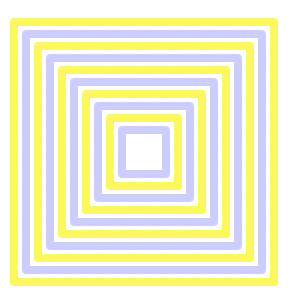

We want to write a recursive function that will draw the above pattern above.

Let's first define our inputs:

* size - the size of the outer-most square (in pixels)
* gap - the whitespace between the squares (in pixels)
* width - the stroke size for the pen
* color_opt - Chooses the color of the square

To write a recursive function, we have to find our base case(s). Let's think of what the "simplest" square pattern to draw would be. Based on our inputs, the "smaller" problems are going to be based on the `size` input. The smaller the `size` (i.e. the smaller the outer-most square), the easier this is to draw.

Let's say that the size of the square must be at least `gap` + `width`. If `size` is smaller than `gap`+`width`, don't draw anything -- it's too small-- and the function should simply return.

```python
if size < width + gap:
    return
```

This defines our <b>base case</b>. 

All that's left is to figure out the <b>recursive case</b>.

* If we only have to draw the outermost square, we can use `draw_squares` to do this:

```python
    # Draw the outer-most square
    draw_square(size, width, color_opt)
```

But all the inner squares are still remaining. How can we write a recursive call to `draw_nested_squares` to draw the remaining squares? What inputs will be different in this new call to `draw_nested_squares`?

Your job is to complet the definition of `draw_nested_squares()` below. You will have to add two lines of code for the recursive case: one line to draw the outermost square and another line to make the recursive call.

In order to get the alternating colors, examine the `color_opt` input. This is a boolean value that will decide the color of the square 

In [ ]:
def draw_nested_squares(size, width, gap, color_opt = True):
    """Will recursively draw nested squares with alternating colors.
    
    Inputs
        size       -    Size of the outer-most square (pixels)
        width      -    Width of strokes (turtle pensize, pixels)
        gap        -    Gap between the squares (pixels)
        color_opt  -    Color option 
    
    """
    
    # base case 
    if size < width + gap:
        return
    
    # Recursive case
    else:
        # # TODO Add your code here and remove the "return" line
        # return
        draw_square(size, width, color_opt)
        draw_nested_squares(size - width - 4*gap, width, gap, not color_opt)

Test your ``draw_squares()`` function below


In [ ]:
# Clear screen and return turtle to center
t.reset()
t.getscreen().title('Problem 2 - Nested Squares')

# test draw_squares()
# draw_nested_squares(100, 10, 5)
draw_nested_squares(300, 10, 5)

# Problem 3 - Fractals
<b>(40 points) </b> In this problem, we will recursively draw a fractal pattern.

A <b> fractal </b> is a pattern that is self-similar on different scales. Here are an example.

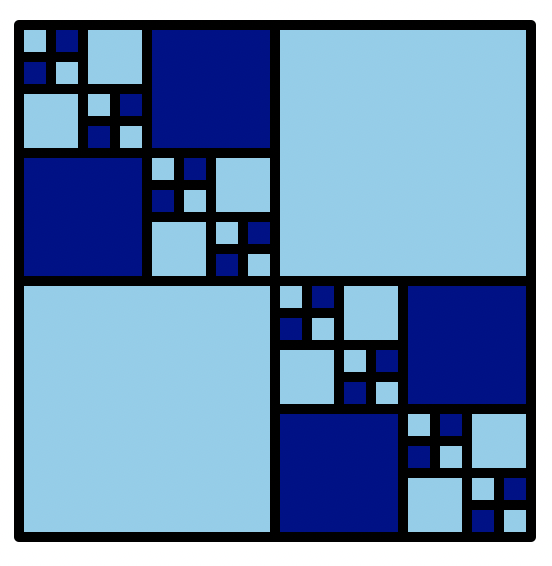

Notice that

* The outermost square can be split into 4 different subsquares
    * Upper Left
    * Upper Right
    * Lower Left
    * Lower Right
<br>

* The Lower Left and Upper Right squares are filled in fully.
<br>

* The Upper Left and Lower Right squares exhibit "self similarity" -- they are smaller versions of the outermost square.
<br>
    * Although Lower Left and Upper Right resemble the outermost square, the colors are swapped.
    

To help us out, here is a function that will draw a square centered at an input coordinate and color it in either dark blue or sky blue (based on the `fill_opt` input)

In [ ]:
def draw_solid_square(size, center, fill_opt=True):
    """
    Draw a square of length "size" centered at "center".
    
    Inputs
        size       -    Size of the square (pixels)
        center     -    Center coordinates for the squares -  
                            tuple (x, y)
        fill_opt   -    Color option 
    
    """
    if fill_opt:
        fill_color = "skyblue"
    else:
        fill_color = "darkblue"
    
    # Set the pen information (size, color, and fill color)
    t.pensize(5) 
    t.pencolor("black")
    t.fillcolor(fill_color)

    # Pick up turtle's pen (i.e. stop drawing)
    t.penup()
    
    # Move pen to be in the center
    t.setpos(center)
    
    # set pen back down (i.e. start drawing)
    t.pendown()

    # setup for filling in with color
    t.begin_fill()
    
    # Draw a square
    t.forward(size)
    t.left(90)
    t.forward(size)
    t.left(90)
    t.forward(size)
    t.left(90)
    t.forward(size)
    t.left(90)
    
    # finish filling in
    t.end_fill()

Here is an example of `draw_solid_square` use to draw in a solid squarecenterd at (-50, 100) of length 50 and filled in blue

In [ ]:
# Clear screen and reset turtle
t.reset()
t.getscreen().title('Problem 3 - Example Solid Squares')

# Start drawing a square
draw_solid_square(50, (-50, 100), True)

# draw another one at a differnt location, different color
draw_solid_square(50, (0, -100), False)

# draw another one at a differnt location, different color
draw_solid_square(70, (-30, -30), True)

Your job is to complete the recursive `draw_fractal` function below. 

The inputs to this function are
* `n`                 - the size of the frawing (in pixels)
* `start_position`    - the center of the drawing (defaults to (0, 0))
* `fill_opt`          - toggles the color of the upper right and lower left subsquarees(quadrants) of the pattern.

First, consider the <b> base cases :</b> What is the eaisest fractal to draw? This would be the smallest. We can set a lower limit on when to stop repeating the pattern. Let' set this to be 16 pixels. Thus we can write our base case as:

```python
    if n <= 16:
        
        draw_solid_square(n, lower_left_start,  fill_opt)
        draw_solid_square(n, upper_right_start,  fill_opt)
        
        draw_solid_square(n, lower_right_start, not fill_opt)
        draw_solid_square(n, upper_left_start, not fill_opt)
```

This is simply filling in the 4 subsquares/quadrants of a 16 pixel square:
* the lower left and upper right are the same color 
* the lower right and upper left are the same color.

The <b> recursive case </b> will require some thought on what the pattern looks like. We can see that the Upper Left and Lower Right subsquares/quadrants are repeating the pattern. This would seem like a good place for a recursive call.

Your job is to complete the function below. Currently, the pattern is only partially completed. The base case is working, but the recursive case is missing a second recursive call. You can try running it as it is defined now to see what is missing visually.

Add a single line of code to complete the function. 

In [ ]:
def draw_fractal(n, start_position = (0, 0), fill_opt = True):
    """ Draws a fractal pattern 
    
    Inputs
    
        n                 -    Size of the drawing
        start_position    -    Center of the drawing. Default (0, 0).
        fill_opt.         -    Color option for filling the solid squares.

    """
    
    # bottom-left coordinate of all 4 quadrants
    lower_left_start = (start_position[0] - n, start_position[1] - n)
    upper_right_start = start_position
    
    lower_right_start = (start_position[0], start_position[1] - n)
    upper_left_start = (start_position[0] - n, start_position[1])
    
    # Centers of all 4 quadrants
    upper_right_center = (start_position[0] + n / 2, start_position[1] + n / 2)
    upper_left_center = (start_position[0] - n / 2, start_position[1] + n / 2)
    
    lower_right_center = (start_position[0] + n / 2, start_position[1] - n / 2)
    lower_left_center = (start_position[0] - n / 2, start_position[1] - n / 2)
    
    if n <= 16:
        
        draw_solid_square(n, lower_left_start,  fill_opt)
        draw_solid_square(n, upper_right_start,  fill_opt)
        
        draw_solid_square(n, lower_right_start, not fill_opt)
        draw_solid_square(n, upper_left_start, not fill_opt)
        
    else:
        draw_fractal(n / 2, upper_left_center, not fill_opt)
        draw_fractal(n / 2, lower_right_center, not fill_opt)
        
        draw_solid_square(n, lower_left_start,  fill_opt)
        draw_solid_square(n, upper_right_start,  fill_opt) 
        

Test your `draw_factal()` function below.

In [ ]:
# Clear screen and reset turtle
t.reset()
t.getscreen().title('Problem 3 - Fractal pattern')

# Draw fractal
n = 128
t.speed(0)
draw_fractal(n)

In [ ]:
# Clear screen and reset turtle
t.reset()
t.getscreen().title('Problem 3 - Fractal pattern')

# Draw fractal
n = 256
t.speed(0)
draw_fractal(n)

# Problem 4

<b>(20 points) </b>Based on the completed fractal diagram for n = 128, how many <b>recursive</b> calls to draw_fractal were made (not including the initial call)?

Each interation of the function cuts down the pixel size by a factor of 2 until there are $n = 16$ pixels remaining. Thus the depth of the recursion is
$$
\log_2(n) - \log_2(16) = \log_2(n/16).
$$ 
In our case, $\log_2(128/16) = \log_2(8) = 3$. Each level of depth requires *two* recursive calls to `draw_fractal()`, one to draw the upper left corner, and another to draw the lower right corner, making the branching tree a binary tree. There are two recursive calls at level zero, and there are two recursive calls *for each new node* at each new level, so $2^2 = 4$ calls at level one and $2^3 = 8$ calls at level two, making $14$ recursive calls in total. More generally, there are
$$
\sum_{k=1}^{\log_2(n/16)} 2^k
$$
recursive calls for arbitrary $n$.